#Import Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv( r"C:\Users\ABO-BAKR\Desktop\projects\data analysis\task 3 netflix\netflix_titles.csv")


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Data exploration


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df['country'].value_counts().head(50)

country
United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
China                              66
Thailand                           61
Argentina                          56
Hong Kong                          53
United States, United Kingdom      47
Italy                              45
Cana

In [9]:
df[df['title'].duplicated() == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5964,s5965,TV Show,9-Feb,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,20-Mar-19,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10-Oct-18,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,29-Mar-19,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


#Data cleaning

In [10]:
df.drop([5964,5965,5966],inplace=True)

In [11]:
df[["country1","country2","country3","country4","country5","country6","country7","country8","country9","country10","country11","country12"]]=df['country'].str.split(",",expand= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6171 non-null   object
 4   cast          7979 non-null   object
 5   country       7974 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8801 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
 12  country1      7974 non-null   object
 13  country2      1319 non-null   object
 14  country3      446 non-null    object
 15  country4      174 non-null    object
 16  country5      60 non-null     object
 17  country6      23 non-null     object
 18  country7      9 non-null      object
 19  country8   

In [13]:
df.drop(columns=['country12','country11','country10','country9','country8','country7'],inplace=True)

In [14]:
df=pd.melt(df,id_vars=['show_id','type','title','director','cast','date_added','release_year','rating','duration','listed_in','description'],value_vars=["country1","country2","country3","country4","country5","country6"],var_name="country")

In [15]:
df

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country,value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",country1,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",country1,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,country1,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",country1,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,country1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52819,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",country6,None
52820,s8804,TV Show,Zombie Dumb,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",country6,NaN
52821,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,country6,None
52822,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",country6,None


In [16]:
df[["list1",'list2','list3']]=df['listed_in'].str.split(",",expand= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52824 entries, 0 to 52823
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       52824 non-null  object
 1   type          52824 non-null  object
 2   title         52824 non-null  object
 3   director      37026 non-null  object
 4   cast          47874 non-null  object
 5   date_added    52764 non-null  object
 6   release_year  52824 non-null  int64 
 7   rating        52800 non-null  object
 8   duration      52806 non-null  object
 9   listed_in     52824 non-null  object
 10  description   52824 non-null  object
 11  country       52824 non-null  object
 12  value         9996 non-null   object
 13  list1         52824 non-null  object
 14  list2         40704 non-null  object
 15  list3         22368 non-null  object
dtypes: int64(1), object(15)
memory usage: 6.4+ MB


In [18]:
df=pd.melt(df,id_vars=['show_id','type','title','director','cast','date_added','release_year','rating','duration','description','country','value'],value_vars=['list1','list2','list3'],value_name='list_value')

In [19]:
df

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country,value,variable,list_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,25-Sep-21,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",country1,United States,list1,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",24-Sep-21,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",country1,South Africa,list1,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",24-Sep-21,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,country1,NaN,list1,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",country1,NaN,list1,Docuseries
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",24-Sep-21,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,country1,India,list1,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158467,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",20-Nov-19,2007,R,158 min,"A political cartoonist, a crime reporter and a...",country6,None,list3,Thrillers
158468,s8804,TV Show,Zombie Dumb,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",country6,NaN,list3,TV Comedies
158469,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",1-Nov-19,2009,R,88 min,Looking to survive in a world taken over by zo...,country6,None,list3,None
158470,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",11-Jan-20,2006,PG,88 min,"Dragged from civilian life, a former superhero...",country6,None,list3,None


In [20]:
movies = df[df['type'] == "Movie"]

In [21]:
TV_Show	= df[df['type'] == "TV Show"]

In [22]:
v = TV_Show['duration'].str.split(" ")

In [ ]:
TV_Show['duration_type'] = season

In [ ]:
TV_Show = TV_Show.drop(columns=["duration"])

In [ ]:
TV_Show['season_number']=TV_Show['season_number'].astype(int)

In [ ]:
movies

In [ ]:
b = movies['duration'].str.split(" ")

In [ ]:
v = []
for i in b:
    if isinstance(i, list) and len(i) > 1:
        try:
            value = int(i[0])
            v.append(value)
        except ValueError:
            v.append(None)
    else:
        v.append(None)
print(v)

In [ ]:
duration_type = []

for i in movies['duration']:
    if isinstance(i, str):
        parts = i.split()
        if len(parts) > 1:
            duration_type.append(parts[1])
        else:
            duration_type.append(None)
    else:
        duration_type.append(None)
print(duration_type)

In [ ]:
movies["duration_Time"] = v

In [ ]:
movies["duration_type"] = duration_type

In [ ]:
movies = movies.drop(columns=["duration"])

In [ ]:
movies.info()

In [ ]:
TV_Show.info()

In [24]:
movies['date_added'] = pd.to_datetime(movies['date_added'])

C:\Users\ABO-BAKR\AppData\Local\Temp\ipykernel_15008\113381035.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movies['date_added'] = pd.to_datetime(movies['date_added'])
C:\Users\ABO-BAKR\AppData\Local\Temp\ipykernel_15008\113381035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['date_added'] = pd.to_datetime(movies['date_added'])


In [25]:
TV_Show['date_added'] = pd.to_datetime(TV_Show['date_added'])

C:\Users\ABO-BAKR\AppData\Local\Temp\ipykernel_15008\1362412687.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  TV_Show['date_added'] = pd.to_datetime(TV_Show['date_added'])
C:\Users\ABO-BAKR\AppData\Local\Temp\ipykernel_15008\1362412687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_Show['date_added'] = pd.to_datetime(TV_Show['date_added'])


In [26]:
movies.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country,value,variable,list_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",country1,United States,list1,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,country1,NaN,list1,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",country1,United States,list1,Dramas
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-09-24,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,country1,United States,list1,Comedies
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",2021-09-23,2021,TV-MA,127 min,After most of her family is murdered in a terr...,country1,Germany,list1,Dramas


In [27]:
movies.drop_duplicates()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country,value,variable,list_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",country1,United States,list1,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,country1,NaN,list1,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",country1,United States,list1,Dramas
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-09-24,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,country1,United States,list1,Comedies
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",2021-09-23,2021,TV-MA,127 min,After most of her family is murdered in a terr...,country1,Germany,list1,Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158466,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",2016-03-09,2015,TV-MA,96 min,Recovering alcoholic Talal wakes up inside a s...,country6,None,list3,Thrillers
158467,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2019-11-20,2007,R,158 min,"A political cartoonist, a crime reporter and a...",country6,None,list3,Thrillers
158469,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2019-11-01,2009,R,88 min,Looking to survive in a world taken over by zo...,country6,None,list3,None
158470,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",country6,None,list3,None


In [28]:
df_unique = df.drop_duplicates(subset = "show_id")

# Data analysis

##Comparison between movies and Tv_Shows

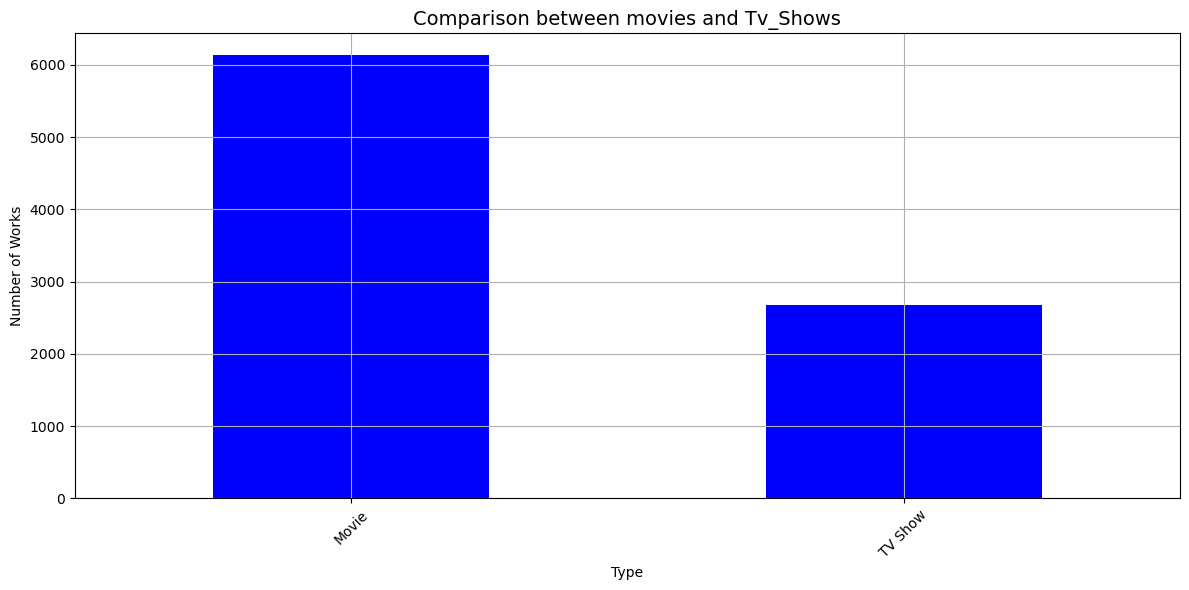

In [32]:
plt.figure(figsize=(12, 6))
df_unique['type'].value_counts().plot(kind='bar',color='blue',grid=True)
plt.title('Comparison between movies and Tv_Shows', fontsize=14)
plt.xlabel('Type')
plt.ylabel('Number of Works')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Top 10 Directors by Works

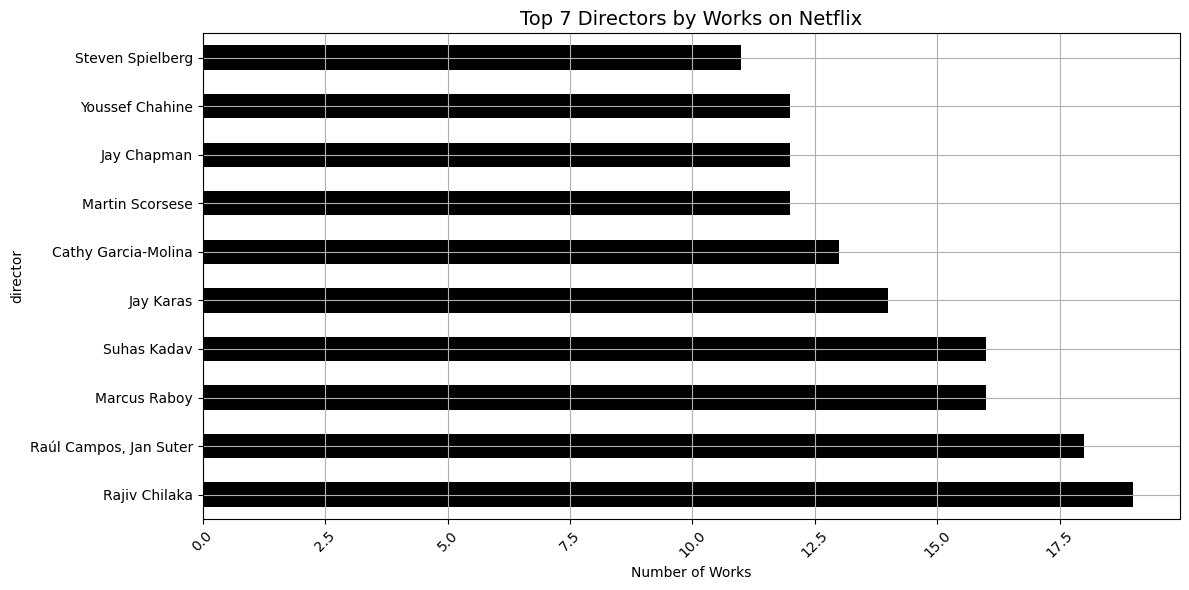

In [38]:
plt.figure(figsize=(12, 6))
df_unique['director'].value_counts().head(10).plot(kind='barh',color='black',grid=True)
plt.title('Top 7 Directors by Works on Netflix', fontsize=14)
plt.xlabel('Number of Works')
plt.ylabel('director')
plt.xlim=(0,20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

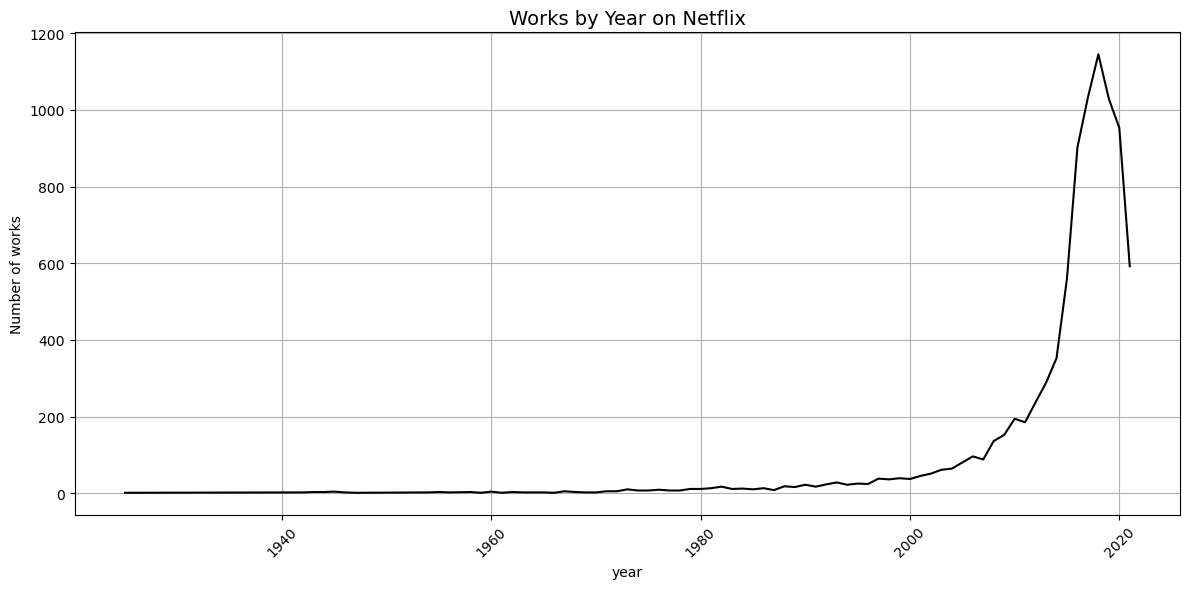

In [39]:
plt.figure(figsize=(12, 6))
df_unique['release_year'].value_counts().sort_index().plot(kind='line',color='black',grid=True)
plt.title('Works by Year on Netflix', fontsize=14)
plt.xlabel('year')
plt.ylabel('Number of works')
plt.xlim=(0,20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

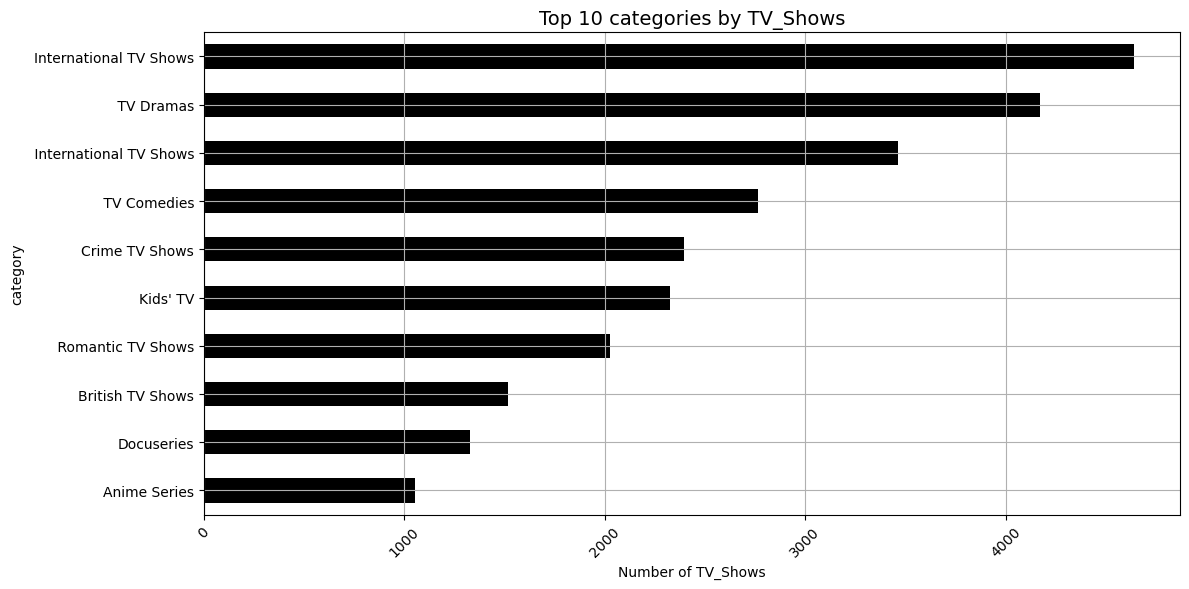

In [40]:
plt.figure(figsize=(12, 6))
TV_Show['list_value'].value_counts().head(10).sort_values().plot(kind='barh',color='black',grid=True)
plt.title('Top 10 categories by TV_Shows', fontsize=14)
plt.xlabel('Number of TV_Shows')
plt.ylabel('category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()